<a href="https://colab.research.google.com/github/luarakerlen/penguin-classification/blob/main/MVP_pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema de Classificação com Pinguins 🐧

Neste notebook, foi utilizado o dataset *Palmer Penguins* para treinar modelos de classificação com base em características físicas dos pinguins. O objetivo é prever a **espécie** com base em variáveis como comprimento do bico e tamanho da nadadeira.


In [110]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [111]:
# Carregar dataset dos pinguins
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
dataset = pd.read_csv(url)

# Visualizar dados iniciais
dataset.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Pré-processamento dos Dados

Selecionamos apenas três variáveis de entrada e removemos linhas com dados ausentes. A variável alvo é a **espécie**.


Foram escolhidas as seguintes variáveis para a predição da espécie dos pinguins:

- `bill_length_mm` (comprimento do bico)
- `bill_depth_mm` (profundidade do bico)
- `flipper_length_mm` (comprimento da nadadeira)

Essas variáveis são altamente informativas e ao mesmo tempo reduzem a complexidade da interface de entrada no front-end.

In [112]:
# Selecionar variáveis mais relevantes e remover valores ausentes
dataset = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'species']].dropna()

# Separar variáveis de entrada e alvo
X = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = dataset['species']

# Codificar a variável alvo (espécie)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Verificar dados após tratamento
X.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0


## Separação em conjunto de treino e conjunto de teste com holdout

In [113]:
test_size = 0.20  # tamanho do conjunto de teste
seed = 7  # semente aleatória

# Separação em conjuntos de treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=test_size,
    shuffle=True,
    random_state=seed,
    stratify=y_encoded
)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# Confirmação visual da separação
print("Formato do treino:", X_train.shape)
print("Formato do teste:", X_test.shape)
print("Distribuição no treino:", pd.Series(y_train).value_counts())
print("Distribuição no teste:", pd.Series(y_test).value_counts())

Formato do treino: (273, 3)
Formato do teste: (69, 3)
Distribuição no treino: 0    121
2     98
1     54
Name: count, dtype: int64
Distribuição no teste: 0    30
2    25
1    14
Name: count, dtype: int64


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.967196 (0.037868)
CART: 0.985450 (0.023934)
NB: 0.977910 (0.024491)
SVM: 0.791270 (0.022438)


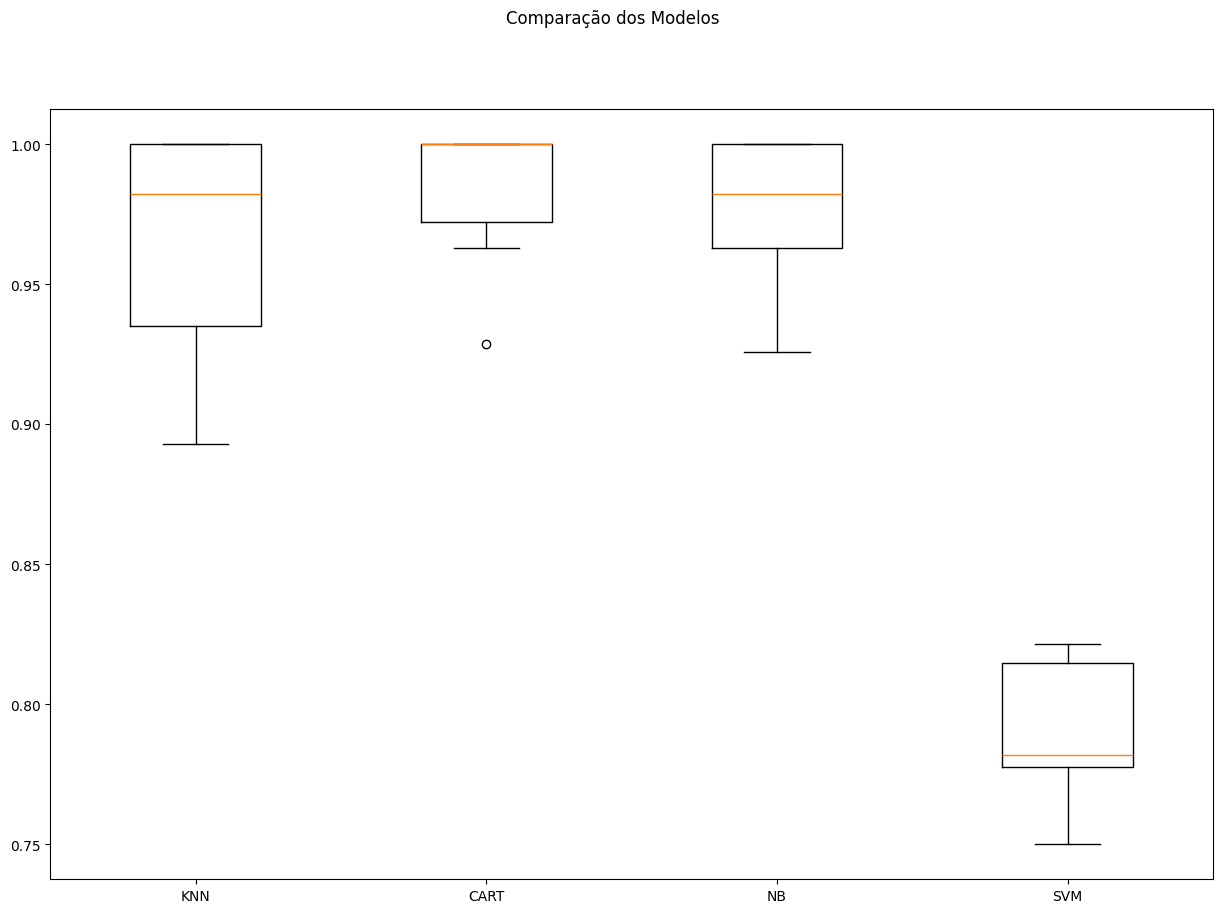

In [114]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.967 (0.038)
CART-orig: 0.985 (0.024)
NB-orig: 0.978 (0.024)
SVM-orig: 0.791 (0.022)
KNN-padr: 0.989 (0.017)
CART-padr: 0.985 (0.024)
NB-padr: 0.978 (0.024)
SVM-padr: 0.982 (0.025)
KNN-norm: 0.989 (0.024)
CART-norm: 0.978 (0.024)
NB-norm: 0.978 (0.024)
SVM-norm: 0.982 (0.025)

Modelo escolhido como final: KNN-norm


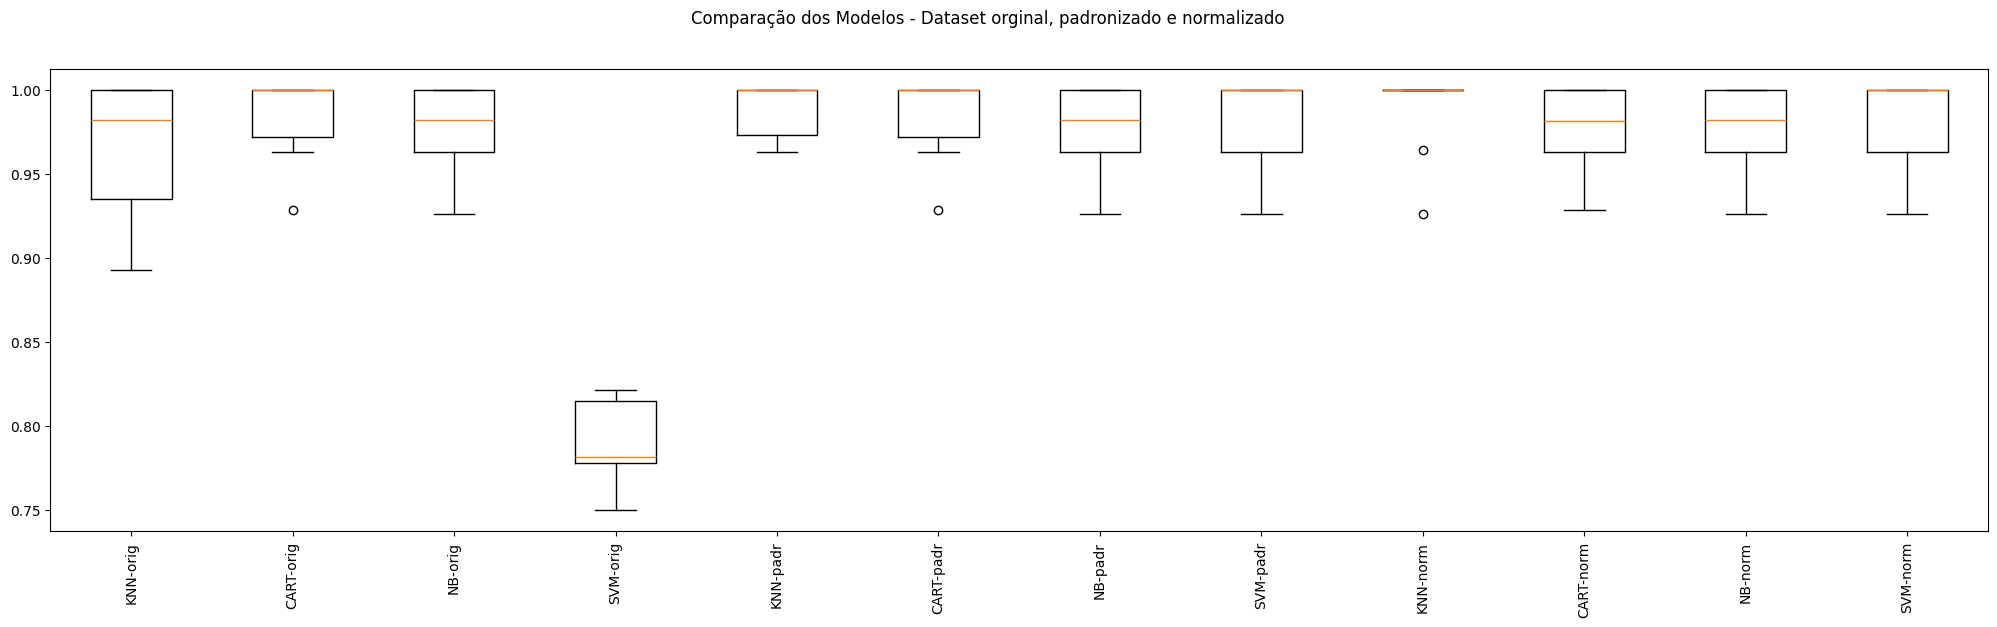

In [115]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Seleção do modelo com melhor média de acurácia
best_index = np.argmax([r.mean() for r in results])
best_name, best_model = pipelines[best_index]
print(f"\nModelo escolhido como final: {best_name}")

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [116]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.981746 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-padr - Melhor: 0.996429 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.992725 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


## Finalização do Modelo

In [117]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
final_model = Pipeline([
    ('scaler', scaler),
    ('model', model)
])

final_model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = final_model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9855072463768116


In [118]:
# Preparação do modelo com TODO o dataset
final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])

## Simulando a aplicação do modelo em dados não vistos

In [119]:
# Novos dados - não sabemos a classe!
data = {
    'culmen_length_mm': [39.1, 50.2, 45.0],
    'culmen_depth_mm': [18.7, 15.0, 17.5],
    'flipper_length_mm': [181, 210, 190],
}

features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']

entry = pd.DataFrame(data, columns=features)
X_entry = entry.values.astype(float)
print(X_entry)

[[ 39.1  18.7 181. ]
 [ 50.2  15.  210. ]
 [ 45.   17.5 190. ]]


In [120]:
# Predição de classes dos dados de entrada
outcomes = final_model.predict(X_entry)
print(outcomes)

['Adelie' 'Gentoo' 'Chinstrap']


## Salvar e baixar o modelo

In [125]:
# Salvar o modelo treinado
joblib.dump(final_model, 'modelo_pinguins.joblib')
joblib.dump(le, 'label_encoder.joblib')

# Fazer o download do arquivo
files.download('modelo_pinguins.joblib')
files.download('label_encoder.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>